### Basic overview of statisitcs

- this chapter is combination of stats, tests, and vizualizations

#### 12.1 Histograms
 - histograms are a repesentation of the data distribution, and a visual tool which can help in investigating our data. 

In [22]:
\l quantQ-master/lib/quantQ_stats.q
.stats:.quantQ.stats

In [23]:
.quantQ.stats.getHistogram

{[data;rule]
    // data -- array of data
    // rule -- function which takes data and returns bins
    // calculate bins
    bins: rule data;
    // return histogram table
    :update 0^histogram from
        ([bins:asc til count[bins]] x:bins) uj
        (select histogram: count bins by bins from ([] bins:bins binr data));
 }


The getHistogram function wraps around binr verb. Is accepts a vector and a fucntion which created the bins.

Choices for the functions include:
- Grid
    - .quantQ.stats.histGrid  explicitly give the bins
- Width
    - .quantQ.stats.histWidth give the width of each bin then it divides the data
- Bins
    - .quantQ.stats.histBin give the number of bins desired
- Square Root
    - .quantQ.stats.histSquareRoot number of bins are the square root of the number of data
- Sturges formula
    - .quantQ.stats.histSturge number of bins are $1+ log_{2}N$ where N is the Number of data points
- Rice's rule
    - .quantQ.stats.histRice number of bins are $N^{1/3}$
- Scotts rule
    - .quantQ.stats.histScott number of bins $3.5 \sigma^{2} / N^{1/3}$

In [24]:
data:(1000?3.0),(200?1.0),(2.0+300?1.0);
select i:i, data from ([]data)

i  data      
-------------
0  0.09106382
1  1.511778  
2  1.474142  
3  0.1995901 
4  2.288034  
5  2.976986  
6  2.06046   
7  1.088019  
8  2.903652  
9  2.308542  
10 0.655659  
11 0.208557  
12 1.826099  
13 1.916956  
14 2.057854  
15 0.02859233
16 1.16014   
17 0.1402431 
18 0.1893067 
19 1.766569  
..


In [25]:
histWidth:.quantQ.stats.getHistogram[data;.quantQ.stats.histWidth[0.2]]
histWidth

bins| x            histogram
----| ----------------------
0   | 0.0008223129 1        
1   | 0.2008223    111      
2   | 0.4008223    99       
3   | 0.6008223    103      
4   | 0.8008223    98       
5   | 1.000822     100      
6   | 1.200822     67       
7   | 1.400822     74       
8   | 1.600822     58       
9   | 1.800822     58       
10  | 2.000822     66       
11  | 2.200822     123      
12  | 2.400822     144      
13  | 2.600822     111      
14  | 2.800822     145      
15  | 3.000822     142      


In [26]:
x:exec bins from histWidth
y:exec histogram from histWidth

In [27]:
\l helper/importmatplotlib.q

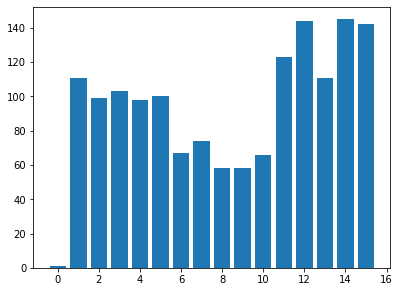

In [28]:
plt:.matplotlib.pyplot[]
plt.bar[x;y];
plt.show[];

In [29]:
histScott:.quantQ.stats.getHistogram[data;.quantQ.stats.histScott]
x:exec bins from histScott
y:exec histogram from histScott

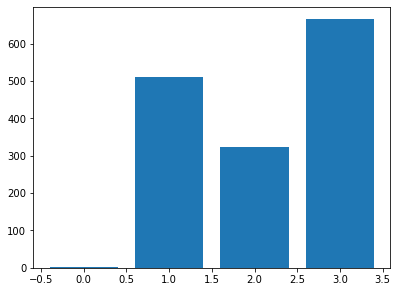

In [30]:
plt:.matplotlib.pyplot[]
plt.bar[x;y];
plt.show[];

Scotts Rule above dosn't seem useful, and indeed its not. The assumtion behind it is a normal distribution and we constructed a data from 3 uniform sets. This demonstraits the need to choose bins carefully.

#### 12.2 Firstr moments

- skewness : for datatribution that are unimodal and not heavy tailed, negitive skew is skewed to the left (lower values) and positive skew is skewed to the right (higher values)

- kurtosis : can be used to assess the heavy tail of the data. positive is said to be leptokurtic (heavy tailed) and negitive values are said to be platykurtic or relatively thin tailed compared to gaussian distribution

In [31]:
.stats.overviewStats[data]

statistics                       values      
---------------------------------------------
"Sample mean"                    1.602063    
"Sample standard deviation"      0.9377828   
"Sample skewness"                -0.1696391  
"Sample kurtosis"                -1.389667   
"Sample min"                     0.0008223129
"Sample max"                     2.998934    
"Number of observations"         1500        
"Number of missing observations" 0           


#### 12.3 Hypothsis testing
- In order to review our data quantitativly we need tests like
    - comparing two sample means
    - sign test
    - correlation

##### p -values
    - For many stats we require a Normal distribution $N(0,1)$
    - We need to form a test to make sure that assumtion holds true
    - To assess we make a null hypothesis and assess if we can reject that null hypothesis
    - In order to calculate, we use p-values
    - In order to assess the significance of the test we rely on confidence intervals

In [32]:
// Confidence intervals
.stats.normTable // zscores for different p values

0.0005 3.290527  
0.005  2.575829  
0.01   2.326348  
0.495  0.01253347
0.5    0         


In [33]:
// confidence of two sided  test
.stats.pValueTwoSided[2.58] 

0.01


In [34]:
.stats.pValueTwoSided[10.0]

0.001


In [35]:
.stats.pValueTwoSided[0.0]

1f


In [36]:
show .stats.pValueLeftSided[-2.58];
show .stats.pValueLeftSided[2.58];

0.005
0.995


In [37]:
show .stats.pValueRightSided[-2.58];
show .stats.pValueRightSided[2.58];

0.995
0.005


##### Correlation
$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$

 - basic tool to assess dependece between two variables
 - cov is the covariance
 - $\sigma$ are the squareroot of the variance
 - bounded by 1 and -1 with one being a positive correlation and -1 being negitive, uncorrelated is near 0
 
 
 Testing
 - Let $H_{o}$ denote the null hypothesis, that two random variables are not correlated
 - Let $H_{a}$ denote the alternitive hypothesis, that tw orandom variables are correlated
 

In [38]:
// constructing the data
x:100?1.0;
y:(0.2*x)+0.8*100?1.0;
cor[x;y]

0.1386074


In [39]:
/calculate the t-statistic
.stats.tStatsCorr[cor[x;y];count x]

1.385517


In [40]:
//assess its significance level
.stats.pValueTwoSided abs .stats.tStatsCorr[cor[x;y];count x]

0.99


The results show that we can reject the Null hypothesis of the correlation being zero. The derived p-value smaller than or equal to zero.

##### t-test One sample

In [41]:
.stats.tTestOneSample[xTest:100?1.0;0.045]

16.57484


In [42]:
.stats.pValueTwoSided abs .stats.tTestOneSample[xTest;0.45]

0.99


p-value of the test is 2%, which suggest we may reject the Null hypothesis at 2% confidence interval

##### t-test Two sample

Drawn from two independent samples
- $X_{N} = x_{1} ... x_{N}$ with mean $\mu_{1}$ , and standard deviation $\sigma_{1}$
- $Y_{M} = y_{1} ... y_{M}$ with mean $\mu_{2}$ , and standard deviation $\sigma_{2}$

###### Hypothesis
- Let $H_{o}$ denote the null hypothesis, that two sample means are equal $\mu_{1} = \mu_{2}$
- Let $H_{a}$ denote the alternitive hypothesis, that tw orandom variables are correlated

To test we need a sutible test statistics. The statistics make assumtions on N, M, $\sigma_{1}$, $\sigma_{2}$. The stronger the assumtions, the closer we get to asymptotic behavior, but at a greater risk of model error if its incorrect.

We focuse on the `Welch's test`, which has the least assumtions:
    $t_{w} = \dfrac{\bar{x} - \bar{y}}{ s_{w}}$
    
We reject the null hypothesis if $|t_{W}| > t_{critical, W_{df}}$, $t_{W} < -t$, $t_{W} > t_{critical, W_{df}}$

In [45]:
/ implimentation
.stats.tTestTwoSample

{[x1;x2]
    // x1,x2 -- two arrays to be tested, unequal length
    // return Welch's statistics
    :(avg[x1]-avg[x2])%sqrt ((s*s:dev[x1])%count[x1])+(z*z:dev[x2])%count[x2];
 }


In [46]:
// test with two samples

.stats.tTestTwoSample[xTest1:100?1.0;xTest2:neg[0.5]+1000?2.0]

0.08538221


In [47]:
// p value 
.stats.pValueTwoSided abs .stats.tTestTwoSample[xTest1;xTest2]

0.99


###### Sig Test
